In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = [0, -1.96571, -1.30821, -0.34766, 0.935902, -0.18454, -0.124711, -0.0970263, 0.935902, 0.18454, -0.124711, 0.0970263, 0.815302, 0.315973, -0.139466, 0]

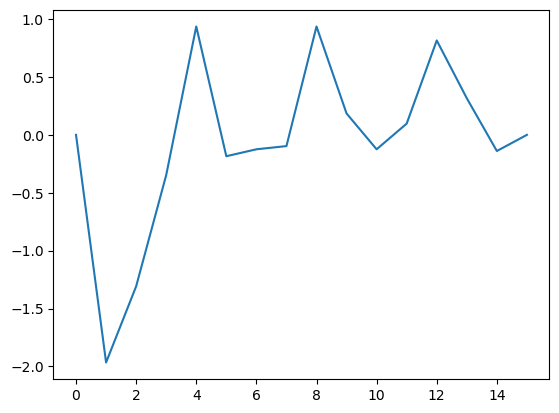

In [4]:
plt.plot(a)